# March 14, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Quick $\pi$-day experiment:

Consider a circle of radius $R$ circumscribed by a square of side lengths $2R$.

<IPython.core.display.Javascript object>


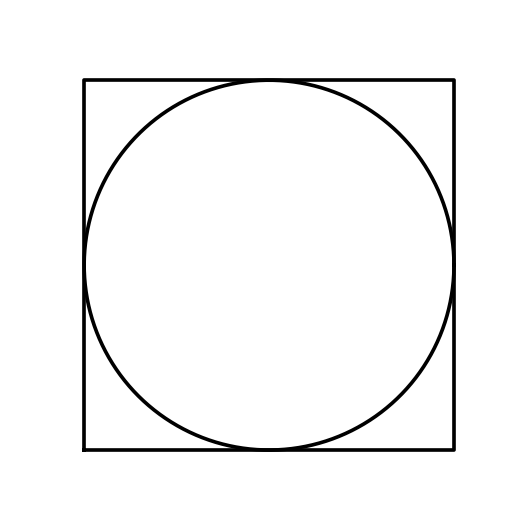

In [3]:
from math import pi

R = 1                                          # Choose circle radius

plt.figure(figsize=(3,3))
t = np.linspace(0,2*pi,500)                    # Parametrize a circle
plt.plot(R*np.cos(t),R*np.sin(t),'k-')         # plot a circle of radius R
plt.plot([-R,R,R,-R,-R],[-R,-R,R,R,-R],'k-')   # plot the circumscribing square with side lengths 2R
plt.axis('equal')                              # Fix aspect ratio to be 1:1
plt.axis('off')                                # Remove all axis labels and ticks
plt.show()

The area of the square is $A_{\text{square}} = (2R) \cdot (2R) = 4R^2$. The area of the circle is $A_{\text{circle}} = \pi R^2$. Then the ratio between the areas is
$$\frac{A_\text{circle}}{A_\text{square}} = \frac{\pi R^2}{4R^2} = \frac{\pi}{4}.$$
Solving for $\pi$ gives 
$$\pi = 4\cdot\frac{A_\text{circle}}{A_\text{square}}.$$

Without knowing $\pi$, we can approximate the ratio $\frac{A_\text{circle}}{A_\text{square}}$ by randomly selecting numerous coordinates $(x,y)$ with $-R \leq x,y \leq R$, then taking the ratio of the number of coordinates $(x,y)$ inside the circle (i.e. $x^2 + y^2 < R^2$) versus the total number of points selected.

<IPython.core.display.Javascript object>


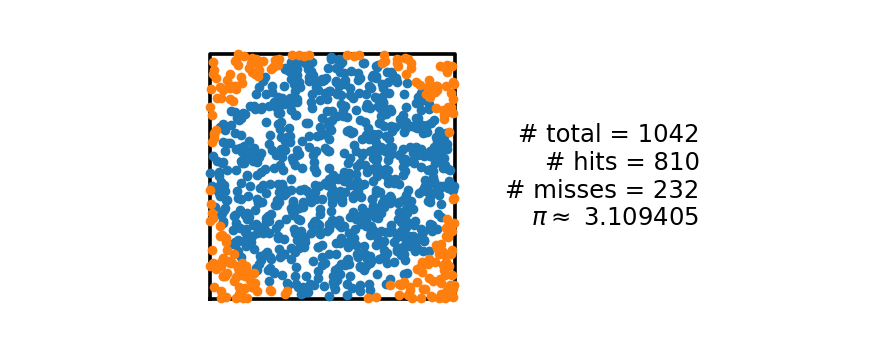

In [5]:
from numpy.random import rand                 # Generate uniformly random points between [0,1]
from time import time                         # Get current time (in seconds from epoch)

T = 30                                        # Fix simulation time...
                                              # ...the code will continue generating random
                                              # points until 'T' seconds have elapsed

R2 = R**2                                     # Pre-compute square radius

fig = plt.figure(figsize=(5,2))               # Generate figure
ax = plt.subplot(1,1,1)                       # Generate axes

ax.plot([-R,R,R,-R,-R],[-R,-R,R,R,-R],'k-')   # Plot circumscribing square with side lengths 2R
ax.set_xlim(-1.1*R,3*R)                       # Set x-limits of plot
ax.set_aspect('equal',adjustable='box')       # Fix aspect ratio to be 1:1
ax.axis('off')                                # Remove all axis labels and ticks

num_total = 0                                 # Total number of random points selected

num_hits = 0                                  # Count the number of points inside the circle
x_hits = []                                   # x-coordinates of each point inside the circle
y_hits = []                                   # y-coordinates of each points inside the circle

num_misses = 0                                # Count the number of points outside the circle
x_misses = []                                 # x-coordinates of each point outside the circle
y_misses = []                                 # y-coordinates of each point outside the circle

hits_plot, = ax.plot([],[],'C0.')             # Initialize plot of points inside the circle
misses_plot, = ax.plot([],[],'C1.')           # Initialize plot of points outside the circle

start_time = time()                           # Start timer
current_time = time()                         # Initialize current time

status_str = '# total = {:}\n'                # Build string template that will keep track...
status_str += '# hits = {:}\n'                # ...of the counts and approximation within...
status_str += '# misses = {:}\n'              # ...the figure
status_str += '$\pi \\approx$ {:7.6f}'

status_text = ax.text(1,.5,'',                # Initialize status text at position (1,.5)...
                      transform=ax.transAxes, # using axes coordinates...
                      ha='right',va='center') # ...with given horizontal and vertical text alignment

while current_time - start_time < T:          # Continue until 'T' seconds have elapsed
    current_time = time()                     # Update current time
    x,y = R*(2*rand(2) - 1)                   # Get new random coordinates
    num_total += 1                            # Increment total number of points selected
    
    r2 = x**2 + y**2                          # Compute distance from origin of new coordinates                
    if r2 < R2:                               # Check if (x,y) is inside the circle
        num_hits += 1                         # Increment number of points inside circle
        x_hits.append(x)                      # Update x-coordinates of points inside circle
        y_hits.append(y)                      # Update y-coordinates of points inside circle
        hits_plot.set_data(x_hits,y_hits)     # Update plot with new points inside circle
        
    else:                                     # Otherwise, point is outside circle 
        num_misses += 1                       # Increment number of points outside circle
        x_misses.append(x)                    # Update x-coordinates of points outside circle
        y_misses.append(y)                    # Update y-coordinates of points outside circle
        misses_plot.set_data(x_misses,y_misses) # Update plot with new points outside circle
        
    pi_approx = 4*num_hits/num_total          # Update approximation of pi
    
    status_text.set_text(status_str.format(num_total,  # Update status text
                                           num_hits,
                                           num_misses,
                                           pi_approx))
    
    fig.canvas.flush_events()                 # Required to force pyplot to update text
    fig.canvas.draw()                         # Force pyplot to update the figure

In [6]:
for n in np.arange(1,9):
    N = 10**n
    x,y = R*(2*np.random.rand(2,N) - 1)
    r2 = x**2 + y**2

    num_hits = (r2 < R2).sum()
    num_total = len(r2)
    pi_approx = 4*num_hits/num_total
    
    print('N = 10^{}: pi ~= {:7.6f}'.format(n,pi_approx))

N = 10^1: pi ~= 3.600000
N = 10^2: pi ~= 2.960000
N = 10^3: pi ~= 3.188000
N = 10^4: pi ~= 3.130800
N = 10^5: pi ~= 3.139760
N = 10^6: pi ~= 3.141572
N = 10^7: pi ~= 3.141723
N = 10^8: pi ~= 3.141660


## More plotting with matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

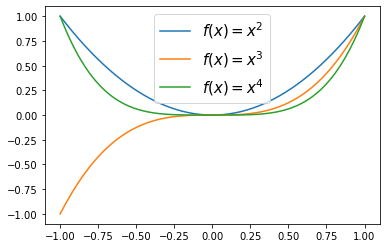

In [3]:
x = np.linspace(-1,1,500)

plt.plot(x,x**2,label='$f(x) = x^2$')
plt.plot(x,x**3,label='$f(x) = x^3$')
plt.plot(x,x**4,label='$f(x) = x^4$')

plt.legend(loc='upper center',fontsize=15)

plt.show()

In [10]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

## Specifying colors in matplotlib

### Color maps

In [4]:
import matplotlib.cm as cm

In [5]:
dir(cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'LUTSIZE',
 'MutableMapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_DeprecatedCmapDictWrapper',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package_

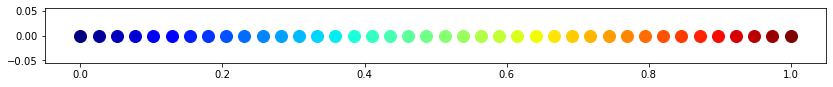

In [6]:
x = np.linspace(0,1,40)

plt.figure(figsize=(14,1))

for t in x:
    plt.plot(t,0,'o',markersize=12,color=cm.jet(t))

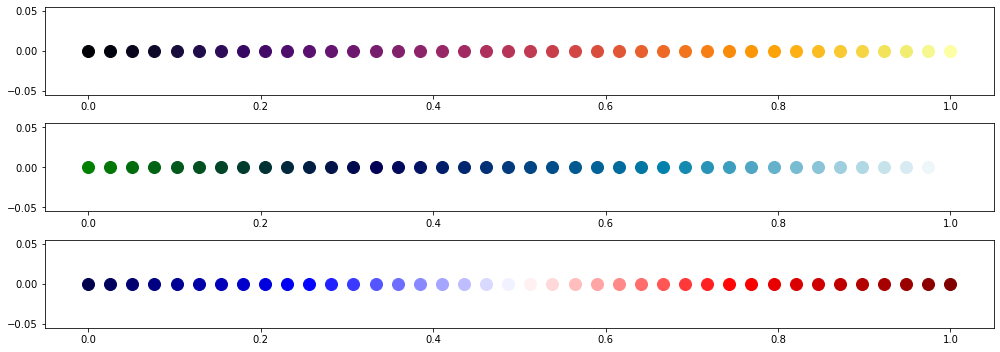

In [9]:
plt.figure(figsize=(14,5))

plt.subplot(3,1,1)
for t in x:
    plt.plot(t,0,'o',ms=12, color=cm.inferno(t))
    
plt.subplot(3,1,2)
for t in x:
    plt.plot(t,0,'o',ms=12, color=cm.ocean(t))
    
plt.subplot(3,1,3)
for t in x:
    plt.plot(t,0,'o',ms=12, color=cm.seismic(t))
    
plt.tight_layout()
plt.show()

This gives us one method of selecting colors beyond the default `'b'`,`'r'`,`'k'`,`'y'`, etc.

We've seen how to add subplots using the `plt.subplot` command, and we've seen how to store the output for later use. For example, if we define `ax = plt.subplot(1,1,1)`, this gives an axis object. We use a number of methods attached to that axis object.

We can directly plot to this subplot using the `ax.plot` method.

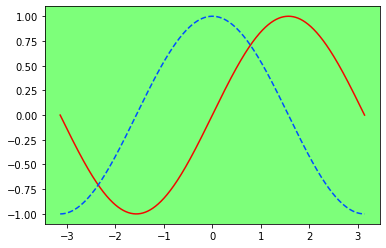

In [14]:
x = np.linspace(-np.pi,np.pi,1000)

plt.figure()
ax = plt.subplot(1,1,1)

ax.plot(x,np.sin(x),'-', color=cm.jet(.9))
ax.plot(x,np.cos(x),'--', color=cm.jet(.2))

ax.set_facecolor(cm.jet(.5))

plt.show()

In [12]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

What does a colormap actually return?

In [15]:
cm.jet(.5)

(0.4901960784313725, 1.0, 0.4775458570524984, 1.0)

What do these numbers mean? This 4-tuple is an RGBA number:
* R is the red value
* G is the green value
* B is the blue value
* A is the alpha or transparency value

## RGB colors

The RGB color model uses basic colors red, green, and blue. All other colors are obtained as mixtures of these basic colors. In the RGB model each color is specified by three numbers describing the intensities of red, blue and green. In `matplotlib` these intensities are normalized to lie between `0` (full off) and `1` (full on).

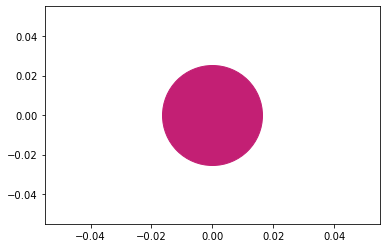

In [24]:
plt.plot(0,0,'o',ms=100, color=(.765,.123,.456))

Let's try to get a sense of what the RGB color space looks like.

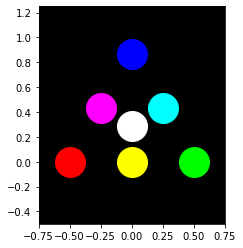

In [34]:
plt.figure()
ax = plt.subplot(1,1,1)
ax.set_facecolor((0,0,0))

ax.set_ylim(-.5,1.25)
ax.set_xlim(-.75,.75)
ax.set_aspect('equal')

h = (3**.5)/2

ax.plot(-.5,0,'o',ms=30,color=(1,0,0))
ax.plot(.5,0,'o',ms=30,color=(0,1,0))
ax.plot(0,h,'o',ms=30,color=(0,0,1))

ax.plot(0,0,'o',ms=30,color=(1,1,0))
ax.plot(-.25,h/2,'o',ms=30,color=(1,0,1))
ax.plot(.25,h/2,'o',ms=30,color=(0,1,1))

ax.plot(0,h/3,'o',ms=30,color=(1,1,1))

plt.show()

## Multidimensional arrays

In [35]:
a = np.arange(20)

print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


One method of generating multidimensional arrays is by using the `np.reshape` function:

In [36]:
b = a.reshape(4,5)

print(b)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


`a.reshape(4,5)` generates a 2-dimensional array that has 4 rows and 5 columns. Note: $4\times 5 = 20$, so we're able to reshape the original length array 20 array in this way.

In [37]:
a.reshape(4,2)

ValueError: cannot reshape array of size 20 into shape (4,2)

In [38]:
print(b.shape)

(4, 5)


In [39]:
print(b.reshape(20))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [43]:
c = a.reshape(10,2)

print(c)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]


In [44]:
print(c.shape)

(10, 2)


We can also reshape into 3-dimensions:

In [46]:
d = a.reshape(5,2,2)
print(d.shape)

(5, 2, 2)


Note: A reshaped array is a view of the original array. Changes to the reshaped array will apply to the original array as well.

In [51]:
print(a)
print()
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


To access elements of a 2-d array, we use indexing just like with 1-d arrays: `b[i,j]` accesses the element in the `i`th row and `j`th column.

In [48]:
a[3]

3

In [50]:
b[2,3]

13

In [52]:
b[2,3] = -5

print(a)
print()
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 -5 14 15 16 17 18 19]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 -5 14]
 [15 16 17 18 19]]


In [53]:
e = b.copy()

e[2,3] = 100

print(a)
print()
print(e)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 -5 14 15 16 17 18 19]

[[  0   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12 100  14]
 [ 15  16  17  18  19]]


We can also use slicing to access parts of a 2-d array.

In [55]:
print(a[2:-1:2])

[ 2  4  6  8 10 12 14 16 18]


We can access the `0`th column of `b` using `b[:,0]`

In [60]:
print(b[1:,0])

[ 5 10 15]


In [63]:
print(b[1,::2])

[5 7 9]


In [64]:
print(b[1:,:-1])

[[ 5  6  7  8]
 [10 11 12 -5]
 [15 16 17 18]]


### Other methods for generating multi-dimensional arrays

We can convert a list of lists into a multi-dimensional array:

In [67]:
triples = np.array([[1,2,3],
                    [4,5,6],
                    [7,8,9],
                    [10,11,12]])

In [68]:
print(triples)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [69]:
a = triples[:,0]
b = triples[:,1]
c = triples[:,2]

In [71]:
print(b)

[ 2  5  8 11]


Note: the interior lists must all have the same length.

In [72]:
np.array([[1,2,3],
          [4,5,6],
          [7,8]])

<ipython-input-72-ea5da8041fb7>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([[1,2,3],


array([list([1, 2, 3]), list([4, 5, 6]), list([7, 8])], dtype=object)

The `np.zeros` function and `np.ones` function can also generate multi-dimensional arrays.

In [73]:
a = np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


Instead of supplying a single integer, we give a tuple `(i,j)` to generate an array of shape `(i,j)`.

In [74]:
b = np.ones((5,3))

print(b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [75]:
c = np.zeros((3,6))

print(c)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [78]:
print(3*b - 1)

[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [79]:
np.sin(3*b-1)

array([[0.90929743, 0.90929743, 0.90929743],
       [0.90929743, 0.90929743, 0.90929743],
       [0.90929743, 0.90929743, 0.90929743],
       [0.90929743, 0.90929743, 0.90929743],
       [0.90929743, 0.90929743, 0.90929743]])

In [80]:
4**b

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

In [81]:
a = np.array([[1,2],
              [3,4]])
b = np.array([[5,6],
              [7,8]])

print(a*b)

[[ 5 12]
 [21 32]]


In the above cell, we generated two $2 \times 2$ arrays. Multiplying them computes the element-by-element product. What if we want to compute the matrix product of the $2 \times 2$ matrices?